#### Домашняя работа №7

##### Задание №1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [3]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

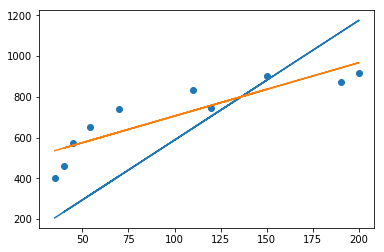

In [4]:
plt.scatter(zp, ks)
plt.plot(zp, zp*5.88)
plt.plot(zp, 444 + zp*2.62);

In [5]:
# без intercept

X = zp.copy()
y = ks.copy()

In [6]:
X = X.reshape(1, -1)
X

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [7]:
y = y.reshape(1, -1)
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [8]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y.T
W

array([[5.88982042]])

In [9]:
# c intercept

X = np.vstack([np.ones((1, X.shape[1])), X])
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [10]:
W1 = np.linalg.inv(np.dot(X, X.T)) @ X @ y.T
W1

array([[444.17735732],
       [  2.62053888]])

##### Задание 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [11]:
lr = 1 / 10**5
n = len(zp)
B_prev = 0
B = 1 / 10**5

while abs(B_prev) < abs(B):
    B_prev = B
    B -= lr * (2 / n) * np.sum((B * zp - y) * zp)
    
B

5.889820420132688

##### Задание 3

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Ответ: Если известны значения, числовые характеристики, математическое ожидание дисперсии, то используется функция Лапласа. 
       При неизвестных характеристиках генеральной совокупности используется распределение Стьюдента.